# **GetThe Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train_set.csv to train_set (1).csv


#**EDA**

In [ ]:
diamond=pd.read_csv('train_set.csv')

In [ ]:
diamond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
diamond.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamond.drop(['Id'],axis=1,inplace=True)

In [ ]:
#We observe that minmum value of x, y and z is zero so we need to delete them
diamond=diamond.loc[(diamond[['x','y','z']]!=0).all(axis=1)]

In [ ]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#make sure that there is no null values
diamond.isna().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#make sure there is no duplicated valus
diamond.duplicated().sum()

97

In [ ]:
# delete duplicated rows
diamond=diamond.drop_duplicates()

In [ ]:
diamond.duplicated().sum()

0

# **VisualizaingThe Data**

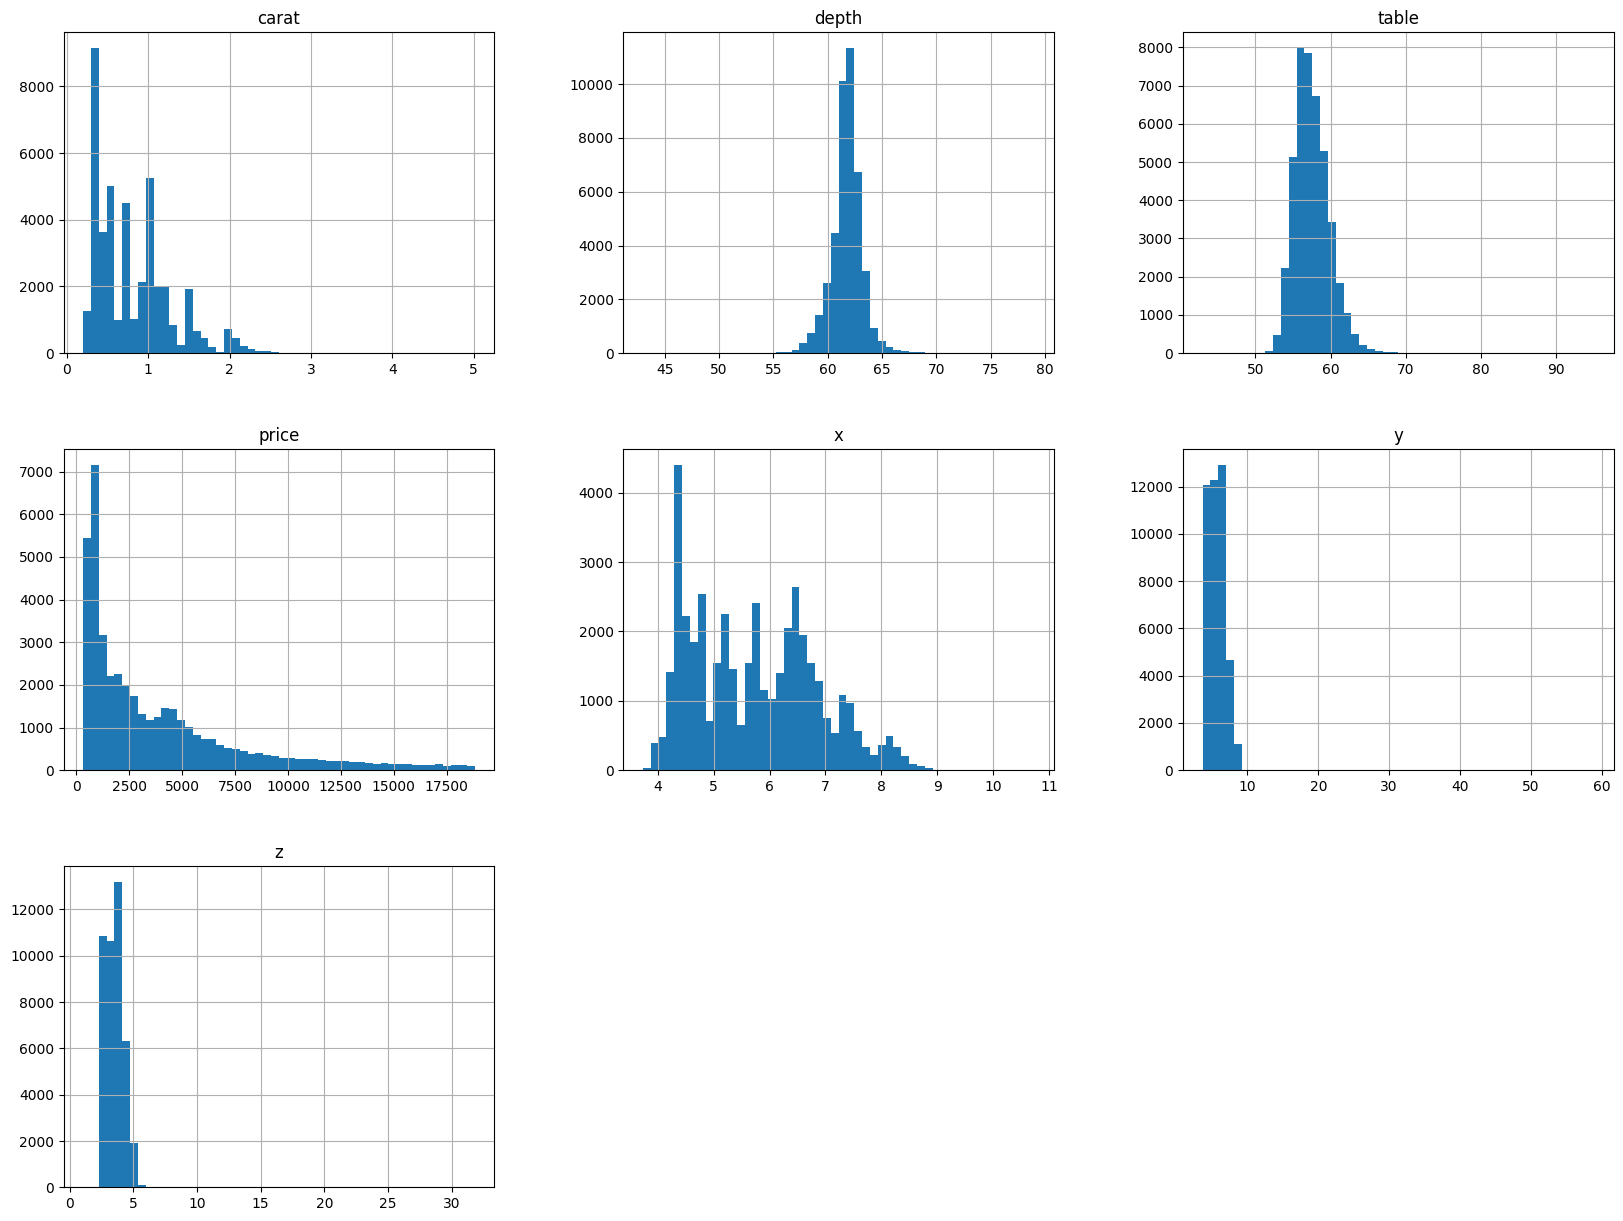

In [ ]:
diamond.hist(figsize=(20,15),bins=50)
plt.show()

<Axes: >

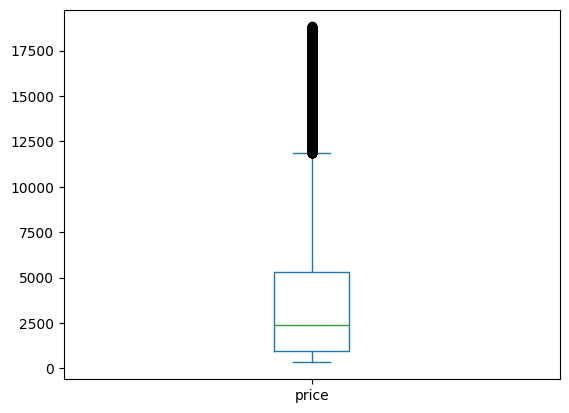

In [ ]:
diamond['price'].plot(kind='box')

<Axes: >

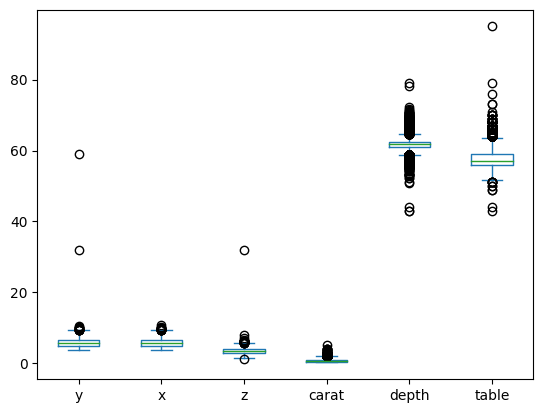

In [ ]:
diamond[['y','x','z','carat','depth','table']].plot(kind='box')

we can see that there are outliers so we should get rid of them

In [ ]:
#dropping outliers
cols=['y','x','z','carat','depth','table']
Q1=diamond[cols].quantile(0.25)
Q3=diamond[cols].quantile(0.75)
IQR=Q3-Q1
diamond=diamond[~((diamond[cols]<(Q1-1.5*IQR))|(diamond[cols]>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
corr_matrix = diamond.corr()
corr_matrix['price'].sort_values(ascending = False)

<ipython-input-110-6143f38c21c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = diamond.corr()


price    1.000000
carat    0.909405
y        0.876453
x        0.874993
z        0.871854
table    0.120474
depth   -0.002582
Name: price, dtype: float64

In [ ]:
diamond[['clarity']].value_counts()

clarity
SI1        9462
VS2        9198
VS1        6131
SI2        6043
VVS2       3901
VVS1       2835
IF         1404
I1          386
dtype: int64

In [ ]:
diamond[['color']].value_counts()

color
G        8488
E        7319
F        7063
H        5932
D        5122
I        3580
J        1856
dtype: int64

In [ ]:
diamond[['cut']].value_counts()

cut      
Ideal        16770
Premium      10174
Very Good     9095
Good          3051
Fair           270
dtype: int64

#Create a Test Set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diamond, test_size=0.2,
random_state=42)

In [ ]:
diamond["carat_cat"] = pd.cut(diamond["carat"],
 bins=[0., 0.5, 1.0, 1.5, 2., np.inf],
 labels=[1, 2, 3, 4, 5])

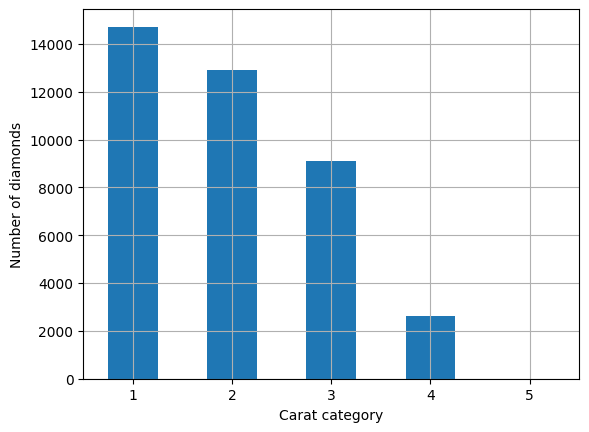

In [ ]:
diamond["carat_cat"].value_counts().sort_index().plot.bar(rot=0,
grid=True)
plt.xlabel("Carat category")
plt.ylabel("Number of diamonds")
plt.show()

In [ ]:
strat_train_set, strat_test_set = train_test_split(
 diamond, test_size=0.2, stratify=diamond["carat_cat"],
random_state=42)


In [ ]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("carat_cat", axis=1, inplace=True)

In [ ]:
diamond= strat_train_set.copy()


<Axes: xlabel='price', ylabel='cut'>

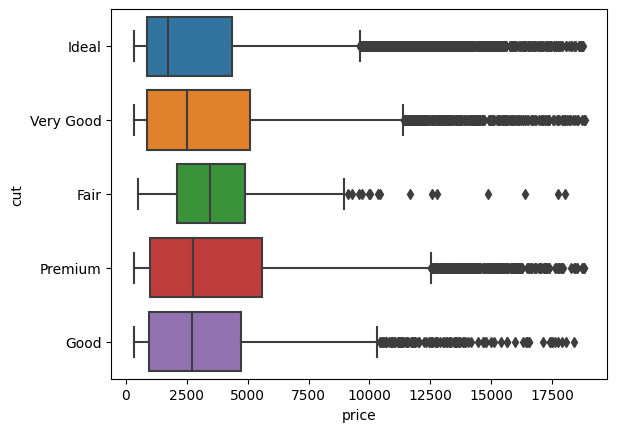

In [ ]:
sns.boxplot(x='price',y='cut',data=diamond)

<Axes: xlabel='price', ylabel='color'>

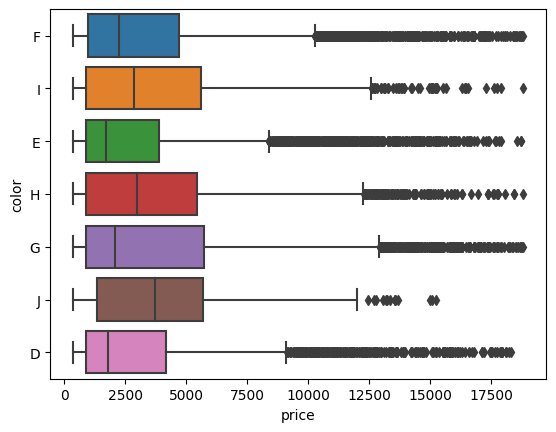

In [ ]:
sns.boxplot(x='price',y='color',data=diamond)

<Axes: xlabel='price', ylabel='clarity'>

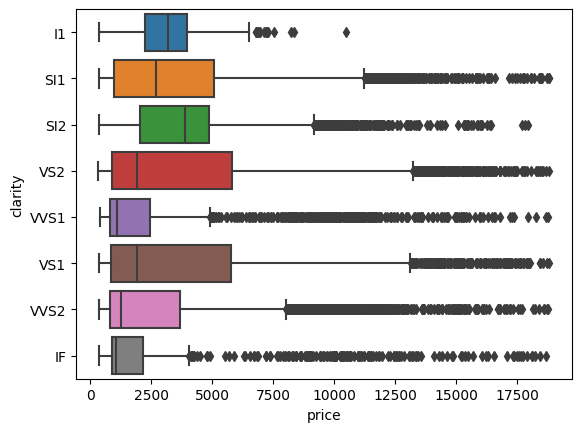

In [ ]:
sns.boxplot(x='price',y='clarity',data=diamond)

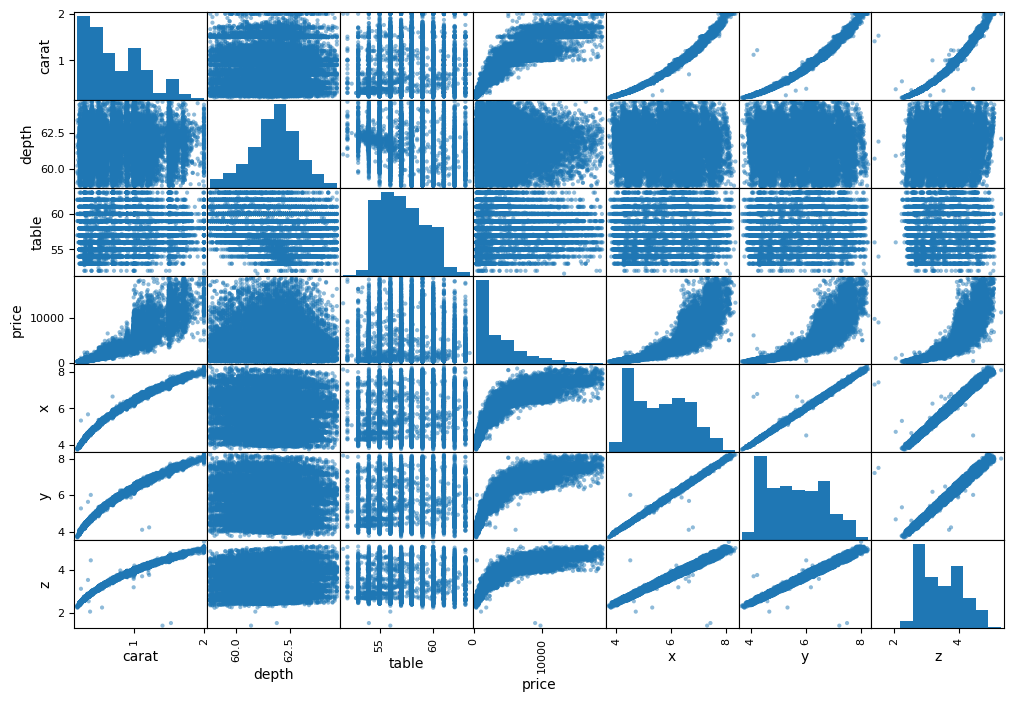

In [ ]:
from pandas.plotting import scatter_matrix


scatter_matrix(diamond, figsize=(12, 8))

plt.show()

<ipython-input-124-381927463550>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamond.corr(),cmap='YlGnBu',annot=True)


<Axes: >

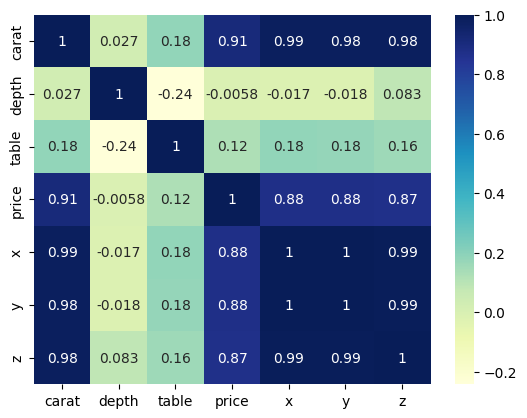

In [ ]:
sns.heatmap(diamond.corr(),cmap='YlGnBu',annot=True)

# Prepare the Data for Machine Learning Algorithms

adding new feature(length_to_width)

In [ ]:
diamond["length_to_width"] = diamond["x"] / diamond["y"]

In [ ]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z,length_to_width
4488,1.06,Ideal,F,I1,61.8,55.0,3544,6.55,6.58,4.06,0.995441
8919,0.54,Ideal,I,SI1,60.0,59.0,1170,5.29,5.31,3.18,0.996234
20187,0.51,Very Good,I,SI2,63.3,58.0,995,5.09,5.02,3.20,1.013944
13839,0.30,Fair,F,VS2,64.5,55.0,662,4.31,4.19,2.74,1.028640
8782,1.51,Premium,I,VS2,60.5,59.0,9682,7.44,7.41,4.49,1.004049
...,...,...,...,...,...,...,...,...,...,...,...
10674,0.33,Ideal,G,VS1,61.8,56.0,854,4.45,4.42,2.74,1.006787
24070,0.41,Ideal,D,VS2,61.2,57.0,889,4.78,4.82,2.94,0.991701
42089,1.50,Good,J,SI2,60.9,62.0,6746,7.30,7.32,4.45,0.997268
15432,0.30,Very Good,G,VVS2,62.9,58.0,638,4.26,4.29,2.69,0.993007


In [ ]:
diamond = strat_train_set.drop("price", axis=1)
diamond_labels = strat_train_set["price"].copy()

In [ ]:
diamond["length_to_width"] = diamond["x"] / diamond["y"]

,carat,cut,color,clarity,depth,table,x,y,z
4488,1.06,Ideal,F,I1,61.8,55.0,6.55,6.58,4.06
8919,0.54,Ideal,I,SI1,60.0,59.0,5.29,5.31,3.18
20187,0.51,Very Good,I,SI2,63.3,58.0,5.09,5.02,3.20
13839,0.30,Fair,F,VS2,64.5,55.0,4.31,4.19,2.74
8782,1.51,Premium,I,VS2,60.5,59.0,7.44,7.41,4.49


In [ ]:
diamond_num = diamond[['table','carat','depth','x','y','z','length_to_width']]

In [ ]:
diamond_cat = diamond[["cut",'color','clarity']]
diamond_cat.head()

,cut,color,clarity
4488,Ideal,F,I1
8919,Ideal,I,SI1
20187,Very Good,I,SI2
13839,Fair,F,VS2
8782,Premium,I,VS2


In [ ]:
from sklearn.preprocessing import OrdinalEncoder



In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.compose import ColumnTransformer
num_col=list(diamond_num)
cat_col=list(diamond[['cut','color','clarity']])

In [ ]:
num_pipeline=Pipeline([("standardize", StandardScaler()),])
cat_pipeline=Pipeline([('Ordinally',OrdinalEncoder()),])

In [ ]:
full_pipeline=ColumnTransformer([
 ("num", num_pipeline, num_col),
 ("cat", cat_pipeline, cat_col),])

In [ ]:
diamond=strat_train_set.copy()
diamond['length_to_width']=diamond['x']/diamond['y']

In [ ]:
diamond.isna().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
length_to_width    0
dtype: int64

In [ ]:
med=diamond['length_to_width'].median()

In [ ]:
diamond['length_to_width'].fillna(med,inplace=True)

In [ ]:
diamond.isna().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
length_to_width    0
dtype: int64

In [ ]:
diamond=full_pipeline.fit_transform(diamond)

# Select and Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamond,diamond_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

diamond_predictions = lin_reg.predict(diamond)
lin_mse = mean_squared_error(diamond_labels, diamond_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1176.4519219782906


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(diamond,diamond_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
diamond_predictions = tree_reg.predict(diamond)
tree_mse = mean_squared_error(diamond_labels,diamond_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

6.014143486399372

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, diamond, diamond_labels, scoring ="neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [629.9051238  580.93930637 599.12532612 679.33368668 649.64739392
 667.89211421 595.29211302 646.5076186  645.94608034 591.91729344]
Mean:  628.6506056509106
Standard Deviation:  32.83192265603747


In [ ]:
scores = cross_val_score(lin_reg, diamond, diamond_labels, scoring ="neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
print("Scores: ", lin_rmse_scores)
print("Mean: ", lin_rmse_scores.mean())
print("Standard Deviation: ", lin_rmse_scores.std())

Scores:  [1182.45706263 1137.59071309 1177.39621616 1186.54623807 1231.80623874
 1176.27365404 1141.91895967 1206.03932518 1182.76658344 1162.17069454]
Mean:  1178.4965685556501
Standard Deviation:  26.425625567997653


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg,diamond, diamond_labels,scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [450.71792693 443.86180909 464.00403704 461.78104888 469.1688153
 467.21904209 424.35133521 493.41754879 472.1871004  449.59840025]
Mean:  459.63070639852805
Standard Deviation:  17.733863257765893


In [ ]:
strat_test_set['length_to_width']=strat_test_set["x"] / strat_test_set["y"]

In [ ]:
strat_test_set.isna().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
length_to_width    0
dtype: int64

In [ ]:
tmed=strat_test_set['length_to_width'].median()

In [ ]:
strat_test_set['length_to_width'].fillna(tmed,inplace=True)

In [ ]:
strat_test_set.isna().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
length_to_width    0
dtype: int64

In [ ]:
x_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

In [ ]:
test_cat_col =list(x_test[['cut','color','clarity']])
test_num_col =list(x_test[['table','carat','depth','x','y','z','length_to_width']])


In [ ]:
tnum_pipeline=Pipeline([("standardize", StandardScaler()),])
tcat_pipeline=Pipeline([('Ordinally',OrdinalEncoder()),])

In [ ]:
tfull_pipeline=ColumnTransformer([
 ("tnum", tnum_pipeline, test_num_col),
 ("tcat", tcat_pipeline, test_cat_col),])

In [ ]:
test_set=tfull_pipeline.fit_transform(x_test)

In [ ]:
forest_reg.fit(diamond,diamond_labels)
predications=forest_reg.predict(test_set)

In [ ]:
forest_mse = mean_squared_error(y_test,predications)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

464.53596956507647

In [ ]:
tree_reg.fit(diamond,diamond_labels)
predications2=tree_reg.predict(test_set)

In [ ]:
tree_mse = mean_squared_error(y_test,predications2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

635.8055415567629

In [ ]:
lin_reg.fit(diamond,diamond_labels)


LinearRegression()

In [ ]:
predictions3 = lin_reg.predict(test_set)
lin_mse = mean_squared_error(y_test,predictions3)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1188.5403478450853


It seems that random forest is the best model

# Applying the choosen model on test_set

In [ ]:
# load test set
uploaded=files.upload()

Saving test_set.csv to test_set.csv


In [ ]:
test=pd.read_csv('test_set.csv')

In [ ]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
test['length_to_width']=test['x']/test['y']

In [ ]:
test.drop('Id',axis=1,inplace=True)

In [ ]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z,length_to_width
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,1.008929
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,1.010563
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,0.989754
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,1.009950
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,0.987500


In [ ]:
test.isna().sum()

carat              0
cut                0
color              0
clarity            0
depth              0
table              0
x                  0
y                  0
z                  0
length_to_width    3
dtype: int64

In [ ]:
medt=test['length_to_width'].median()
test['length_to_width'].fillna(medt,inplace=True)

In [ ]:
test=full_pipeline.fit_transform(test)

In [ ]:
forest_reg.fit(diamond,diamond_labels)
tpredications=forest_reg.predict(test)

In [ ]:
test=pd.read_csv('test_set.csv')

In [ ]:
submission=test[['Id']]
submission

,Id
0,1
1,2
2,3
3,4
4,5
...,...
10783,10784
10784,10785
10785,10786
10786,10787


In [ ]:
submission['price']=predications

<ipython-input-211-32cbf13b365f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=predications


In [ ]:
submission.to_csv('submission.csv',index=None)